# Mistral 7B - Evaluation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer

In [2]:
base_output_dir = r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\mistral7b"
prompt_approaches = os.listdir(base_output_dir)

## Model Metrics

In [3]:
df_results = LLMAnalyzer.load_metrics_from_prompt_approaches(base_output_dir, prompt_approaches)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:715: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


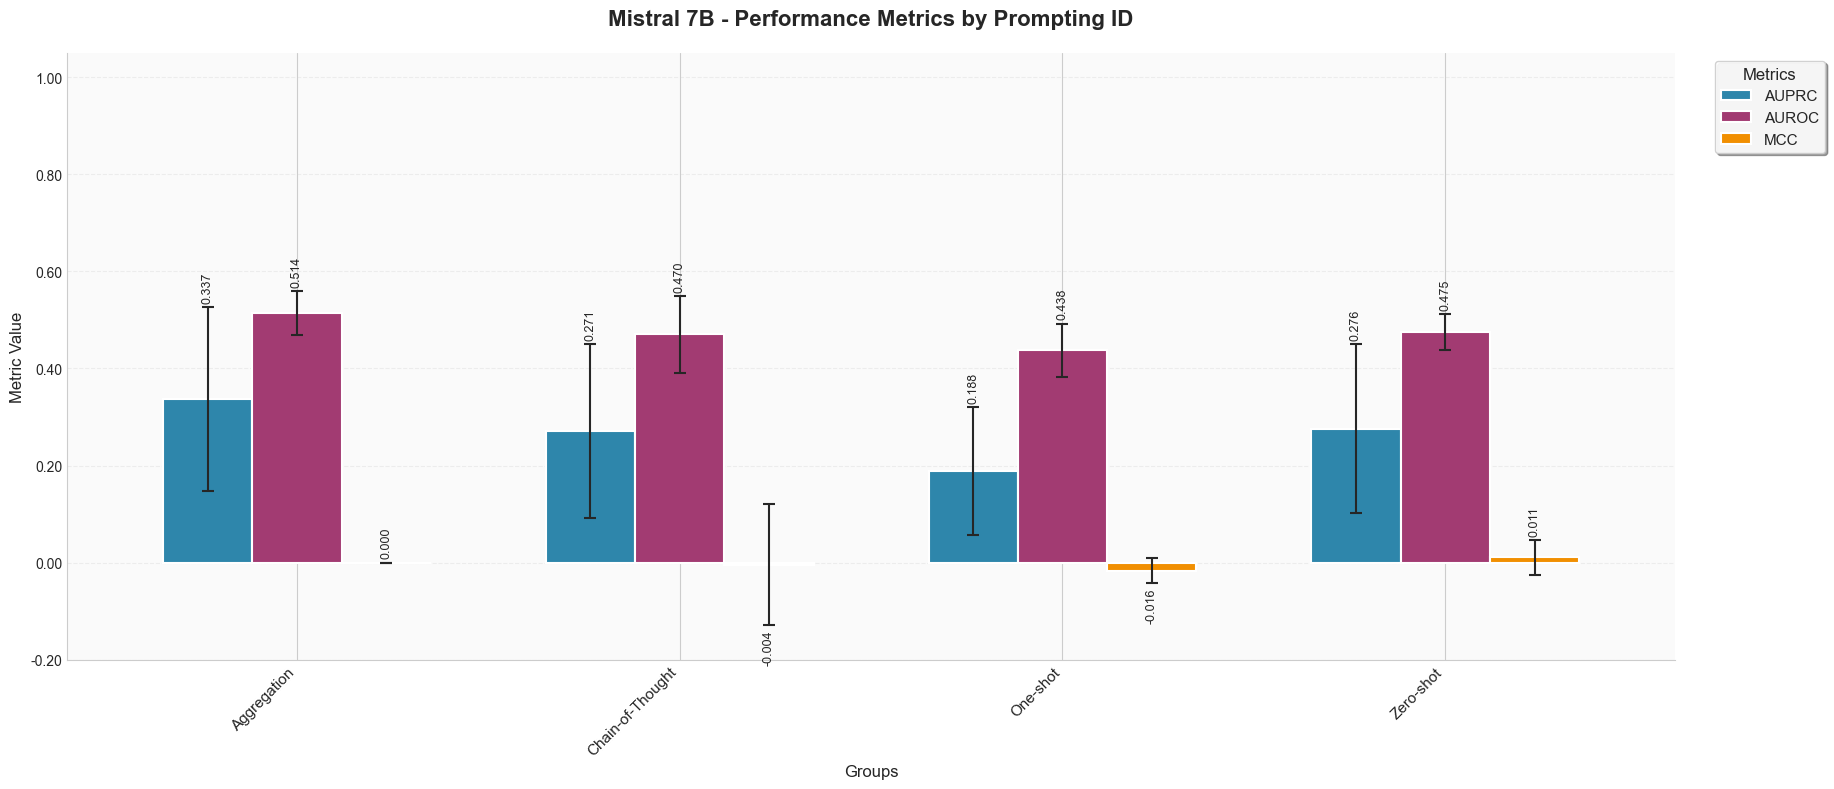

In [4]:
LLMAnalyzer.plot_metrics(
    df_results, group=["prompting_id"], title_prefix="Mistral 7B - "
)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:715: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


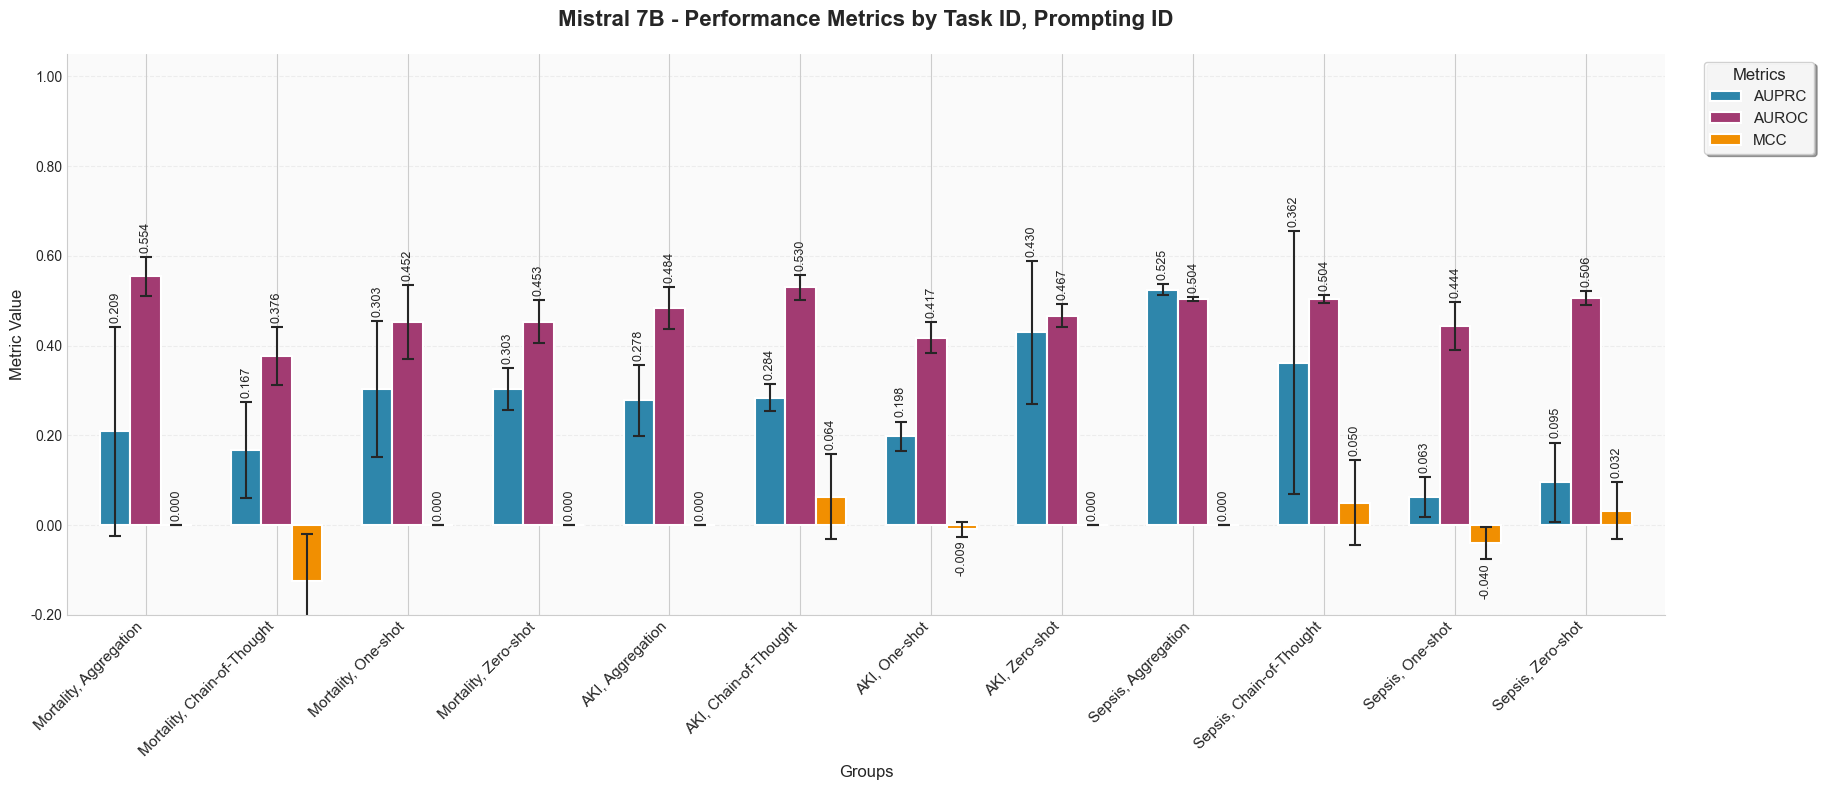

In [5]:
LLMAnalyzer.plot_metrics(
    df_results, group=["task_id", "prompting_id"], title_prefix="Mistral 7B - "
)

In [6]:
import ipywidgets as widgets
from IPython.display import display

Analysis of best prompting approach

In [7]:
prompt_dropdown = widgets.Dropdown(
    options=prompt_approaches,
    value=prompt_approaches[0],
    description='Prompt Approach:',
    style={'description_width': 'initial'}
)
display(prompt_dropdown)


Dropdown(description='Prompt Approach:', options=('sarvari_aggregation', 'zhu_2024a_cot', 'zhu_2024b_one_shot'…

In [8]:
best_approach_path = os.path.join(
    base_output_dir, prompt_dropdown.value
)
print(f"Loading metadata from: {best_approach_path}")
print("======================================================")
cat_files = LLMAnalyzer.categorize_files([best_approach_path], verbose=False)
df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])

Loading metadata from: C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\llms\mistral7b\sarvari_aggregation
Model Name: Mistral, Task: aki, Dataset: eicu, Timestamp: 20250623_184546
Model Name: Mistral, Task: aki, Dataset: hirid, Timestamp: 20250623_184546
Model Name: Mistral, Task: aki, Dataset: miiv, Timestamp: 20250623_184546
Model Name: Mistral, Task: mortality, Dataset: eicu, Timestamp: 20250623_184546
Model Name: Mistral, Task: mortality, Dataset: hirid, Timestamp: 20250623_184546
Model Name: Mistral, Task: mortality, Dataset: miiv, Timestamp: 20250623_184546
Model Name: Mistral, Task: sepsis, Dataset: eicu, Timestamp: 20250623_184546
Model Name: Mistral, Task: aki, Dataset: miiv, Timestamp: 20250623_184546
Model Name: Mistral, Task: mortality, Dataset: eicu, Timestamp: 20250623_184546
Model Name: Mistral, Task: mortality, Dataset: hirid, Timestamp: 20250623_184546
Model Name: Mistral, Task: mortality, Dataset: miiv, Timestamp: 20250623_184546
Model Nam

In [9]:
LLMAnalyzer.print_approach_summary(df_mdata)

,task,dataset,mean_inference_time,total_inference_time,mean_input_tokens,total_input_tokens,mean_output_tokens,total_output_tokens,positive_samples,negative_samples,total_samples,pos_neg_ratio
0,aki,eicu,2.38s,2337.84s,2406,2367447,94,92062,305,679,984,0.45
1,aki,hirid,2.42s,2379.37s,2410,2366296,96,94231,159,823,982,0.19
2,aki,miiv,2.41s,2375.71s,2409,2370549,96,94046,229,755,984,0.30
3,mortality,eicu,3.73s,372.63s,2389,238907,150,14972,7,93,100,0.08
4,mortality,hirid,3.82s,381.70s,2394,239384,155,15499,11,89,100,0.12
5,mortality,miiv,3.73s,372.94s,2393,239266,152,15152,12,88,100,0.14
6,sepsis,eicu,3.14s,3078.51s,2447,2398066,127,124028,47,933,980,0.05
7,sepsis,hirid,3.00s,2902.79s,2452,2375602,120,116493,73,896,969,0.08
8,sepsis,miiv,3.08s,3053.13s,2450,2425059,124,122753,25,965,990,0.03


In [10]:
metrics_report = cat_files['metrics_report_files'][0]
df_metrics = pd.read_json(metrics_report)
df_metrics

,model_id,task_id,dataset,run_id,prompting_id,metrics_summary
0,Mistral,mortality,eicu,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.604, 'auprc': 0.065, '..."
1,Mistral,mortality,hirid,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.521, 'auprc': 0.477000..."
2,Mistral,mortality,miiv,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.538, 'auprc': 0.085, '..."
3,Mistral,aki,eicu,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.47900000000000004, 'au..."
4,Mistral,aki,hirid,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.532, 'auprc': 0.21, 'n..."
5,Mistral,aki,miiv,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.44, 'auprc': 0.258, 'n..."
6,Mistral,sepsis,eicu,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.503, 'auprc': 0.524, '..."
7,Mistral,sepsis,hirid,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.509, 'auprc': 0.538, '..."
8,Mistral,sepsis,miiv,20250623184546,sarvari_2024_aggregation_preprocessor,"{'overall': {'auroc': 0.501, 'auprc': 0.513, '..."


In [11]:
# Save metrics to results.json using the LLMAnalyzer method
added_count, updated_count = LLMAnalyzer.save_metrics_to_results_json(
    metrics_report_path=metrics_report,
    results_json_path="../docs/results.json"
)

Adding new record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_184546'
Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_184546'
Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_184546'
Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_184546'
Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_184546'
Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_184546'
Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_184546'
Updating existing record: model_id='Mistral', prompting_id='sarvari_2024_aggregation_preprocessor', run_id='20250623_184546'
Updatin